In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations
lats= np.random.uniform(-90.000,90.000, size=1500)
lngs=np.random.uniform(-90.000,90.000,size=1500)
lats_lngs= zip(lats,lngs)
lats_lngs

In [4]:
#add the lats and lngs to a list
coordinates=list(lats_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities=[]
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique add to the list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)
        


595

In [7]:
# Import the requests library
import requests
#Import the API Key
from config import weather_api_key

In [8]:
# Starting the URL for Weather Map API Call
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key


In [9]:
# Import the datetime module from the datetime library
from datetime import datetime


In [10]:
# Creat an empty list to hold the weather data
city_data=[]
#print the beginning of the logging 
print("Beginning Data Retrieval   ")
print("---------------------------")
#create counters
record_count=1
set_count=1


Beginning Data Retrieval   
---------------------------


In [11]:
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
    #Create endpoint URL with each city
    
    city_url= url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count+=1
#Run an API request for each of the cities
    try:
    #Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()
        #parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity= city_weather["main"]["humidity"]
        city_clouds= city_weather["clouds"]["all"]
        city_wind= city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the data to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass
    #Indicate the Data Loading is complete
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")
    

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | crab hill
City not found. Skipping...
Processing Record 4 of Set 1 | moose factory
Processing Record 5 of Set 1 | ostrovnoy
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | harrisonburg
Processing Record 12 of Set 1 | marsh harbour
Processing Record 13 of Set 1 | rocha
Processing Record 14 of Set 1 | veraval
Processing Record 15 of Set 1 | carutapera
Processing Record 16 of Set 1 | orissaare
Processing Record 17 of Set 1 | paracuru
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | gorom-gorom
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1

Processing Record 35 of Set 4 | mouila
Processing Record 36 of Set 4 | nsanje
Processing Record 37 of Set 4 | sao joao da barra
Processing Record 38 of Set 4 | mubi
Processing Record 39 of Set 4 | antofagasta
Processing Record 40 of Set 4 | quatre cocos
Processing Record 41 of Set 4 | indian trail
Processing Record 42 of Set 4 | cadillac
Processing Record 43 of Set 4 | sao bento
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 46 of Set 4 | oranjestad
Processing Record 47 of Set 4 | tocopilla
Processing Record 48 of Set 4 | grindavik
Processing Record 49 of Set 4 | rio grande
Processing Record 50 of Set 4 | vincennes
Processing Record 1 of Set 5 | carmo do cajuru
Processing Record 2 of Set 5 | ati
Processing Record 3 of Set 5 | chissamba
Processing Record 4 of Set 5 | uvat
Processing Record 5 of Set 5 | plettenberg bay
Processing Record 6 of Set 5 | zhezkazgan
Processing Record 7 of Set 5 | sali

Processing Record 25 of Set 8 | zhanakorgan
Processing Record 26 of Set 8 | camacha
Processing Record 27 of Set 8 | hilton head island
Processing Record 28 of Set 8 | caravelas
Processing Record 29 of Set 8 | mutis
Processing Record 30 of Set 8 | ostersund
Processing Record 31 of Set 8 | quelimane
Processing Record 32 of Set 8 | north myrtle beach
Processing Record 33 of Set 8 | tabuk
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | mikhaylovsk
Processing Record 36 of Set 8 | aykino
Processing Record 37 of Set 8 | torata
Processing Record 38 of Set 8 | bowling green
Processing Record 39 of Set 8 | atasu
Processing Record 40 of Set 8 | makokou
Processing Record 41 of Set 8 | jijiga
Processing Record 42 of Set 8 | xai-xai
Processing Record 43 of Set 8 | sao felix do xingu
Processing Record 44 of Set 8 | palaia fokaia
Processing Record 45 of Set 8 | asyut
Processing Record 46 of Set 8 | gornopravdinsk
Processing Record 47 of Set 8 | oriximina
Processing Record 48 of

Processing Record 18 of Set 12 | el balyana
City not found. Skipping...
Processing Record 19 of Set 12 | templin
Processing Record 20 of Set 12 | safwah
City not found. Skipping...
Processing Record 21 of Set 12 | vagur
Processing Record 22 of Set 12 | pastavy
Processing Record 23 of Set 12 | zharkent
Processing Record 24 of Set 12 | zhanaozen
Processing Record 25 of Set 12 | mmabatho
Processing Record 26 of Set 12 | magaria
Processing Record 27 of Set 12 | makinsk
Processing Record 28 of Set 12 | elizabeth city
Processing Record 29 of Set 12 | halifax
Processing Record 30 of Set 12 | kegayli
City not found. Skipping...
Processing Record 31 of Set 12 | shelburne
Processing Record 32 of Set 12 | humaita
Processing Record 33 of Set 12 | waw
Processing Record 34 of Set 12 | gunjur
Processing Record 35 of Set 12 | pemba
Processing Record 36 of Set 12 | mandera
Processing Record 37 of Set 12 | corleone
Processing Record 38 of Set 12 | san-pedro
Processing Record 39 of Set 12 | tuggurt
City 

In [12]:
len(city_data)

551

In [13]:
#Convert the city_data dictionary to a datafram
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,62.11,71,0,3.00,ZA,2021-10-21 00:57:04
1,Moose Factory,51.2585,-80.6094,37.40,65,90,6.91,CA,2021-10-21 00:58:26
2,Ostrovnoy,68.0531,39.5131,31.73,73,100,18.12,RU,2021-10-21 00:58:26
3,Kruisfontein,-34.0033,24.7314,61.83,61,100,2.53,ZA,2021-10-21 00:58:27
4,Punta Arenas,-53.1500,-70.9167,44.71,61,20,11.50,CL,2021-10-21 00:55:10
5,Jamestown,42.0970,-79.2353,60.33,67,90,6.91,US,2021-10-21 00:54:12
6,Mar Del Plata,-38.0023,-57.5575,61.09,46,0,1.01,AR,2021-10-21 00:58:28
7,Harrisonburg,38.4496,-78.8689,58.03,83,1,0.00,US,2021-10-21 00:57:26
8,Marsh Harbour,26.5412,-77.0636,80.20,56,92,15.50,BS,2021-10-21 00:58:29
9,Rocha,-34.4833,-54.3333,50.85,91,0,6.64,UY,2021-10-21 00:58:29


In [14]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [15]:
#Add new column data to new and or overwrite the datatframe
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-10-21 00:57:04,-33.9258,18.4232,62.11,71,0,3.00
1,Moose Factory,CA,2021-10-21 00:58:26,51.2585,-80.6094,37.40,65,90,6.91
2,Ostrovnoy,RU,2021-10-21 00:58:26,68.0531,39.5131,31.73,73,100,18.12
3,Kruisfontein,ZA,2021-10-21 00:58:27,-34.0033,24.7314,61.83,61,100,2.53
4,Punta Arenas,CL,2021-10-21 00:55:10,-53.1500,-70.9167,44.71,61,20,11.50
5,Jamestown,US,2021-10-21 00:54:12,42.0970,-79.2353,60.33,67,90,6.91
6,Mar Del Plata,AR,2021-10-21 00:58:28,-38.0023,-57.5575,61.09,46,0,1.01
7,Harrisonburg,US,2021-10-21 00:57:26,38.4496,-78.8689,58.03,83,1,0.00
8,Marsh Harbour,BS,2021-10-21 00:58:29,26.5412,-77.0636,80.20,56,92,15.50
9,Rocha,UY,2021-10-21 00:58:29,-34.4833,-54.3333,50.85,91,0,6.64


In [16]:
#Create the output file(CSV)
output_data_file= "weather_data/cities.csv"
#export the city_data into a CSV"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Extract relevant fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

In [18]:
#Import the time module
import time

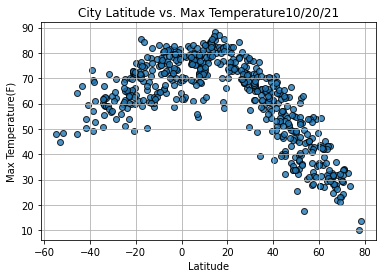

In [19]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,max_temps, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

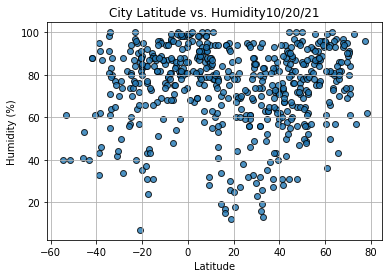

In [20]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,humidity, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

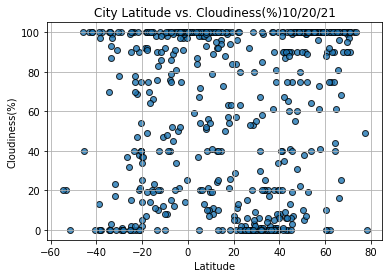

In [21]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,cloudiness, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

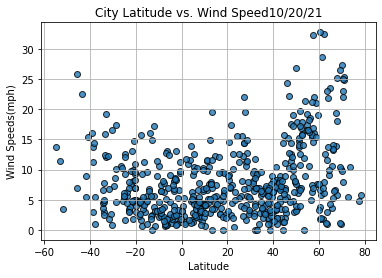

In [22]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,wind_speed, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speeds(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [23]:
#import linregress
from scipy.stats import linregress

#Create a function to createperform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
   
    #run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    #Calculate the regression line y_values
    regress_values=x_values*slope +intercept
    #Get the equation of the line
    line_eq="y= "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13= city_data_df.loc[13]
index13

City                     Paracuru
Country                        BR
Date          2021-10-21 00:58:31
Lat                         -3.41
Lng                      -39.0306
Max Temp                     81.1
Humidity                       80
Cloudiness                    100
Wind Speed                    8.1
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
                  

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Moose Factory,CA,2021-10-21 00:58:26,51.2585,-80.6094,37.40,65,90,6.91
2,Ostrovnoy,RU,2021-10-21 00:58:26,68.0531,39.5131,31.73,73,100,18.12
5,Jamestown,US,2021-10-21 00:54:12,42.0970,-79.2353,60.33,67,90,6.91
7,Harrisonburg,US,2021-10-21 00:57:26,38.4496,-78.8689,58.03,83,1,0.00
8,Marsh Harbour,BS,2021-10-21 00:58:29,26.5412,-77.0636,80.20,56,92,15.50


In [26]:
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] <= 0)]

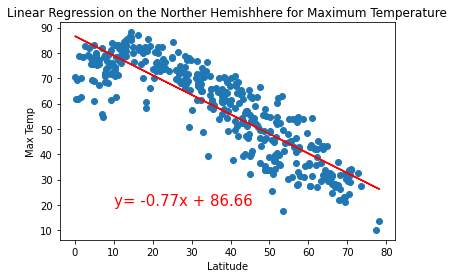

In [27]:
#Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Norther Hemishhere for Maximum Temperature','Max Temp',(10,20))

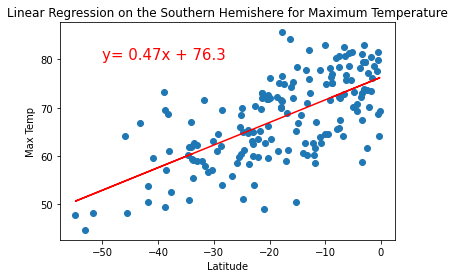

In [28]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for Maximum Temperature',"Max Temp",(-50,80))

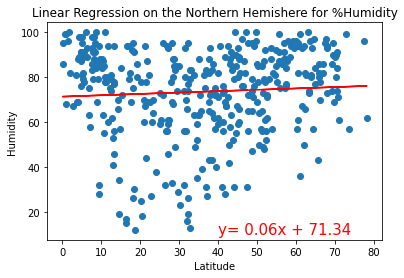

In [29]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for %Humidity',"Humidity",(40,10))

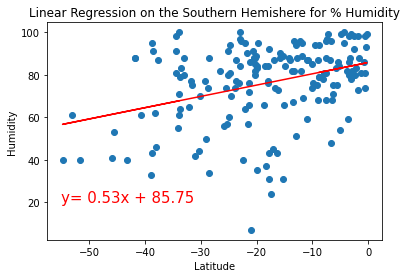

In [30]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for % Humidity',"Humidity",(-55,20))

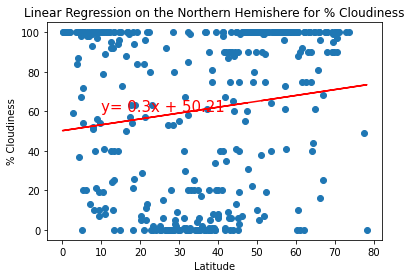

In [31]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for % Cloudiness',"% Cloudiness",(10,60))

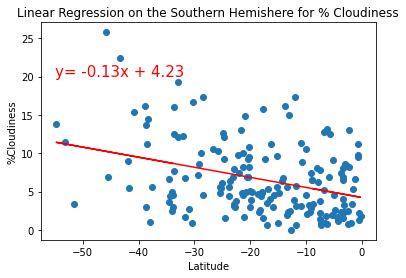

In [32]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for % Cloudiness',"%Cloudiness",(-55,20))

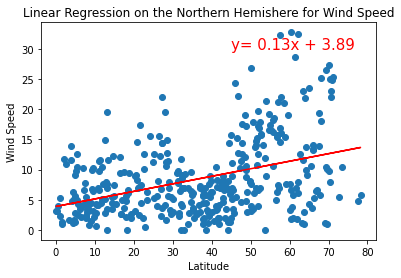

In [33]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for Wind Speed',"Wind Speed",(45,30))

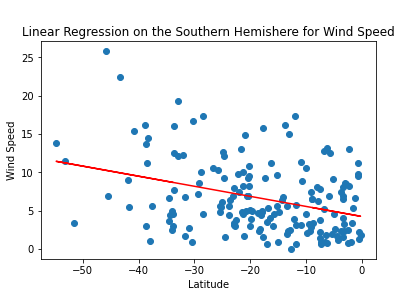

LinregressResult(slope=-0.13121283591253388, intercept=4.228965360698187, rvalue=-0.34681589896355114, pvalue=2.7564651250917928e-06, stderr=0.027057335075811716, intercept_stderr=0.5971025495495107)

In [34]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for Wind Speed',"Wind Speed",(-55,30))

linregress(x_values,y_values)